In [2]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py312_cu121_pyt280/download.html
!pip install opencv-python matplotlib numpy trimesh

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached iopath-0.1.10.tar.gz (42 kB)
  Preparing metadata (setup.py) ... done
  Using cached portalocker-3.2.0-py3-none-any.whl.metadata (8.7 kB)
Using cached portalocker-3.2.0-py3-none-any.whl (22 kB)
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61397 sha256=de3118fa545fe0328b291f89d44a265a71fee5b1c8eec424efe1d24a98e6d50f
  Stored in directory: /root/.cache/pip/wheels/ed/9f/a5/e4f5b27454ccd4596bd8b62432c7d6b1ca9fa22aef9d70a16a
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=9c94618bfd6293ac6924d593f247980515146d6d01c012f2068734d1b7e738e6
  Stored in directory: /root/.cache/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb1634357812220aac58d4698048c
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/p

In [3]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


CUDA available: True
Device name: Tesla T4


--2025-09-30 23:31:51--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/JPEG_example_flower.jpg/600px-JPEG_example_flower.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42624 (42K) [image/jpeg]
Saving to: ‘sample_object.jpg’

sample_object.jpg   100%[===================>]  41.62K  --.-KB/s    in 0.02s   

2025-09-30 23:31:51 (2.12 MB/s) - ‘sample_object.jpg’ saved [42624/42624]



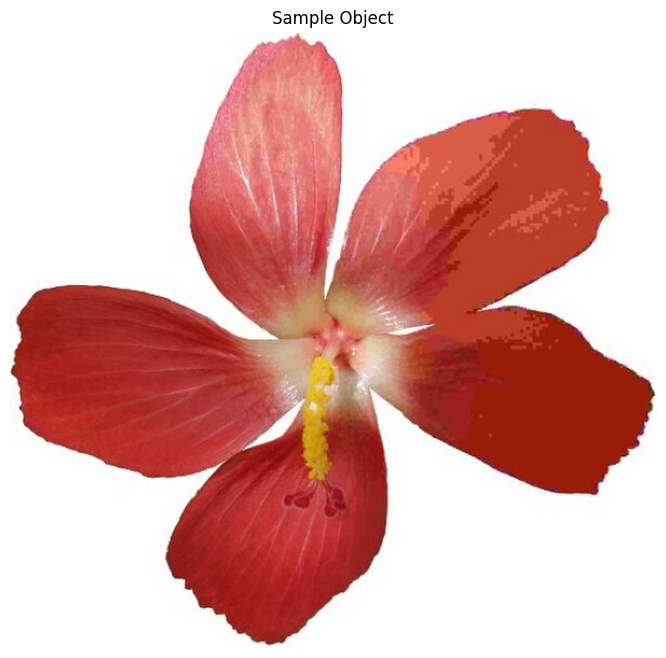

In [4]:
# Download a sample image of an object
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/JPEG_example_flower.jpg/600px-JPEG_example_flower.jpg -O sample_object.jpg

# Load and display it
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('sample_object.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.title("Sample Object")
plt.axis('off')
plt.show()

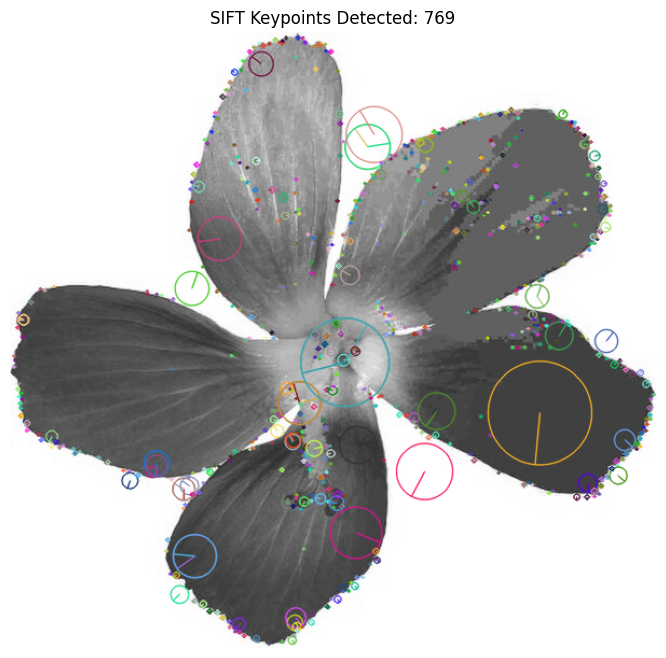

Number of keypoints detected: 769


In [5]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect SIFT keypoints
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
img_keypoints = cv2.drawKeypoints(gray, keypoints, None,
                                   flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,8))
plt.imshow(img_keypoints)
plt.title(f"SIFT Keypoints Detected: {len(keypoints)}")
plt.axis('off')
plt.show()

print(f"Number of keypoints detected: {len(keypoints)}")

In [ ]:
import os, json, cv2, torch, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from pytorch3d.io import load_objs_as_meshes
from pytorch3d.renderer import (
    look_at_view_transform, OpenGLPerspectiveCameras, PointLights,
    RasterizationSettings, MeshRasterizer, MeshRenderer, HardPhongShader
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img_size = 384
default_fov_deg = 60.0
print("Using device:", device)


Using device: cuda


In [ ]:
from huggingface_hub import login
login()  # paste your token when prompted


In [ ]:
from huggingface_hub import snapshot_download

local_dir = "/content/drive/MyDrive/3DObjectReconstruction/data/shapenet"

snapshot_download(
    repo_id="ShapeNet/ShapeNetCore",
    repo_type="dataset",
    local_dir=local_dir,
    allow_patterns=[
        "03001627/1a0bc9ab92c915167ae33d942430658c/models/model_normalized.obj"
    ],
)


Fetching 0 files: 0it [00:00, ?it/s]

'/content/drive/MyDrive/3DObjectReconstruction/data/shapenet'

In [1]:
# Render a single view of the chair
# Set up camera position
R, T = look_at_view_transform(dist=2.0, elev=20, azim=0)
cameras = OpenGLPerspectiveCameras(device=device, R=R, T=T)

# Load mesh and render
# mesh = load_objs_as_meshes([obj_file_path], device=device)
# rendered_image = render(mesh, cameras)
# Show the image with detected keypoints

NameError: name 'look_at_view_transform' is not defined

In [2]:
# Convert to grayscale, run SIFT
# sift = cv2.SIFT_create()
# keypoints, descriptors = sift.detectAndCompute(gray_image, None)
# Visualize keypoints